## Sale Price Prediction using Linear, Ridge and Lasso Regression For Housing market in Australia

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the dataset
saleprice = pd.read_csv("C:\\Users\\mahesh.krishna\\Downloads\\mlai-advreg-assignment\\train.csv")

In [3]:
# summary of the dataset: 1460 rows, 81 columns, no null values
print(saleprice.shape)
print(saleprice.info())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [4]:
# Identify all numeric values in the data set 
saleprice_numeric = saleprice.select_dtypes(include=['float64', 'int64'])
saleprice_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [5]:
saleprice_numeric = saleprice_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
saleprice_numeric.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000


In [6]:
##Outlier analysis(Treatment)

In [7]:
saleprice_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1314.100000,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,...,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.050000,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,...,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,1445.410000,141.000000,37567.640000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,...,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


{'whiskers': [<matplotlib.lines.Line2D at 0x23642bc37c0>,
 'caps': [<matplotlib.lines.Line2D at 0x23642bc3e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x23642bc3610>],
 'medians': [<matplotlib.lines.Line2D at 0x23642be1340>],
 'fliers': [<matplotlib.lines.Line2D at 0x23642be1610>],
 'means': []}

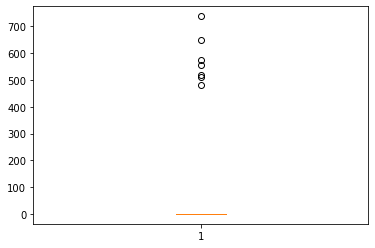

In [8]:
plt.boxplot(saleprice['PoolArea'])

In [9]:
#As per the excel sheet there are only 7 values that are greater than 0 and the rest values are just 0, so dropping those specific columns will help 
saleprice=saleprice[(saleprice['PoolArea']==0)]
saleprice.shape

(1453, 81)

(1402, 81)

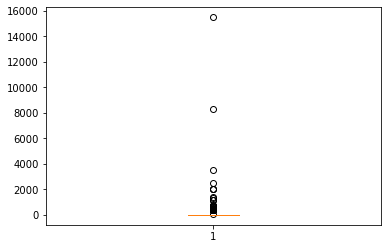

In [10]:
#As per the excel sheet there are only 7 values that are greater than 0 and the rest values are just 0, so dropping those specific columns will help 
plt.boxplot(saleprice['MiscVal'])
saleprice=saleprice[(saleprice['MiscVal']==0)]
saleprice.shape

{'whiskers': [<matplotlib.lines.Line2D at 0x236433ec9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x236433ecf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x236433ec6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x236433fa550>],
 'fliers': [<matplotlib.lines.Line2D at 0x236433fa820>],
 'means': []}

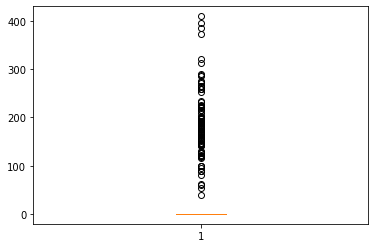

In [11]:
plt.boxplot(saleprice['ScreenPorch'])

In [12]:
#As per the excel sheet there are only 100 values that are greater than 0 and the rest values are just 0 for screenporch, so dropping those specific columns will help 
saleprice=saleprice[(saleprice['ScreenPorch']==0)]
saleprice.shape


(1291, 81)

9546.0


(1274, 81)

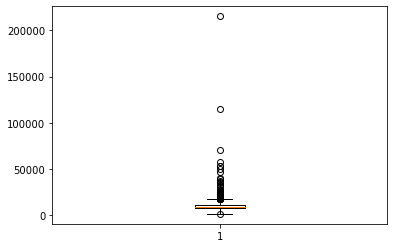

In [13]:
plt.boxplot(saleprice['LotArea'])
Q1 = saleprice['LotArea'].quantile(0.1)
Q3 = saleprice['LotArea'].quantile(0.9)
IQR = Q3 - Q1
print(IQR)
saleprice = saleprice[(saleprice['LotArea'] >= Q1 - 1.5*IQR) & 
                      (saleprice['LotArea'] <= Q3 + 1.5*IQR)]
saleprice.shape

{'whiskers': [<matplotlib.lines.Line2D at 0x236434b4910>,
 'caps': [<matplotlib.lines.Line2D at 0x236434b4eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x236434b4610>],
 'medians': [<matplotlib.lines.Line2D at 0x236434c3490>],
 'fliers': [<matplotlib.lines.Line2D at 0x236434c3760>],
 'means': []}

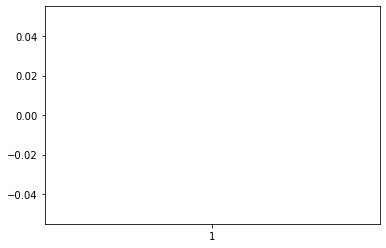

In [14]:
plt.boxplot(saleprice['MasVnrArea'])

In [15]:
Q1 = saleprice['MasVnrArea'].quantile(0.1)
Q3 = saleprice['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
saleprice = saleprice[(saleprice['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (saleprice['MasVnrArea'] <= Q3 + 1.5*IQR)]
saleprice.shape

(1255, 81)

(1253, 81)

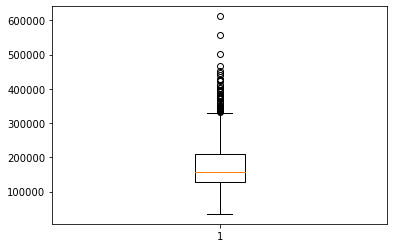

In [16]:
plt.boxplot(saleprice['SalePrice'])
Q1 = saleprice['SalePrice'].quantile(0.1)
Q3 = saleprice['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
saleprice = saleprice[(saleprice['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (saleprice['SalePrice'] <= Q3 + 1.5*IQR)]
saleprice.shape

In [17]:
##Checking correlation values
corelation = saleprice_numeric.corr()
#corelation
corelation.sort_values(by="SalePrice",ascending=False)


,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
SalePrice,-0.021917,0.351799,0.263843,0.477493,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,...,0.708624,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,1.000000
GrLivArea,0.008273,0.402797,0.263116,0.390857,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,...,1.000000,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.708624
GarageArea,0.017634,0.344997,0.180403,0.373066,0.296970,-0.018227,0.183303,0.486665,0.489782,0.138347,...,0.468997,1.000000,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.623431
TotalBsmtSF,-0.015415,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,...,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.010496,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,...,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
MasVnrArea,-0.050298,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,...,0.390857,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,-0.005024,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,...,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
LotFrontage,-0.010601,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,...,0.402797,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
WoodDeckSF,-0.029643,0.088521,0.171698,0.159718,0.204306,0.067898,-0.005316,0.232019,0.235459,0.092165,...,0.247433,0.224666,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.073378,-0.009551,0.324413
2ndFlrSF,0.005590,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,...,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334


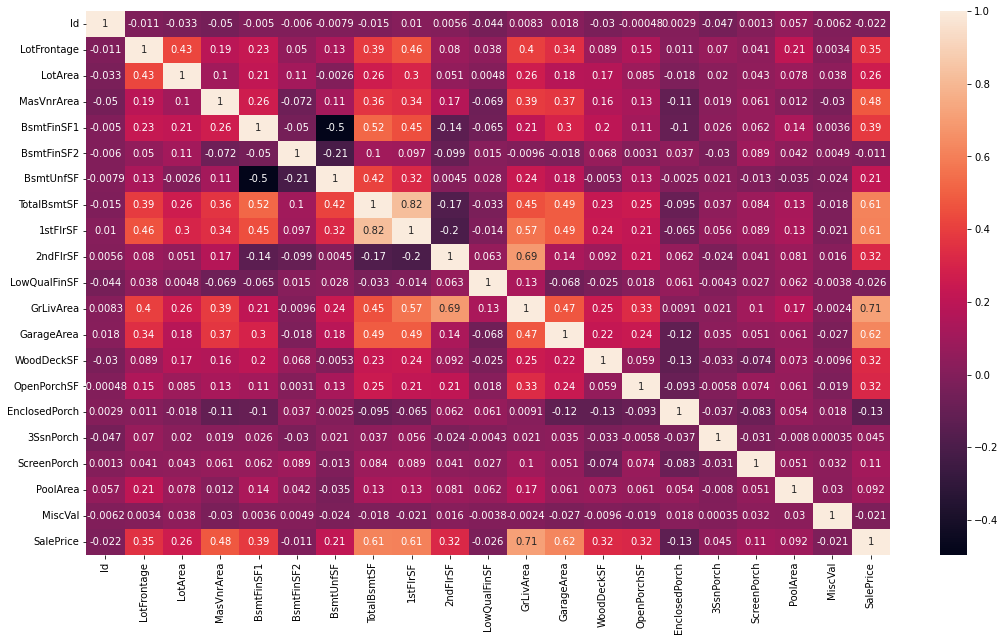

In [18]:
# plotting correlations on heatmap
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(corelation, annot=True)
plt.show()

### 2. Data cleaning


In [19]:
saleprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1253 non-null   int64  
 1   MSSubClass     1253 non-null   int64  
 2   MSZoning       1253 non-null   object 
 3   LotFrontage    1040 non-null   float64
 4   LotArea        1253 non-null   int64  
 5   Street         1253 non-null   object 
 6   Alley          82 non-null     object 
 7   LotShape       1253 non-null   object 
 8   LandContour    1253 non-null   object 
 9   Utilities      1253 non-null   object 
 10  LotConfig      1253 non-null   object 
 11  LandSlope      1253 non-null   object 
 12  Neighborhood   1253 non-null   object 
 13  Condition1     1253 non-null   object 
 14  Condition2     1253 non-null   object 
 15  BldgType       1253 non-null   object 
 16  HouseStyle     1253 non-null   object 
 17  OverallQual    1253 non-null   int64  
 18  OverallC

In [20]:
saleprice.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      213
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [21]:
#checking percentage of missing values in each field
round(100*(saleprice.isnull().sum()/len(saleprice.index)), 2)

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      17.0
LotArea           0.0
                 ... 
MoSold            0.0
YrSold            0.0
SaleType          0.0
SaleCondition     0.0
SalePrice         0.0
Length: 81, dtype: float64

In [22]:
#we can notice that alley has 93 percent missing values, however looking at data dictonionary its clear that NA represents No alley.
saleprice['Alley'].fillna('No Alley', inplace=True)

In [23]:
#similary like above , verifying the FireplaceQu filed
saleprice['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [24]:
#Similary replacing NA in PoolQC field
saleprice['PoolQC'].fillna('No Pool', inplace=True) 

In [25]:
#similary NA in Fence 
saleprice['Fence'].fillna('No Fence', inplace=True) 

In [26]:
#NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.
saleprice['GarageType'].fillna('No Garage', inplace=True) 
saleprice['GarageFinish'].fillna('No Garage', inplace=True) 
saleprice['GarageQual'].fillna('No Garage', inplace=True) 
saleprice['GarageCond'].fillna('No Garage', inplace=True) 

In [27]:
saleprice['MasVnrArea'].fillna(0, inplace=True)
saleprice['LotFrontage'].fillna(0, inplace=True) 
saleprice['MasVnrType'].fillna('None', inplace=True)
saleprice['BsmtQual'].fillna('No Basement', inplace=True)
saleprice['BsmtCond'].fillna('No Basement', inplace=True)
saleprice['BsmtExposure'].fillna('No Basement', inplace=True)
saleprice['BsmtFinType1'].fillna('No Basement', inplace=True)
saleprice['BsmtFinType2'].fillna('No Basement', inplace=True)
saleprice['Electrical'].fillna('SBrkr', inplace=True)

In [28]:
print(saleprice.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [29]:
saleprice= saleprice.drop('MiscFeature', axis=1)

In [30]:
print(saleprice.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64


In [31]:
saleprice['YearBuilt'] = 2023 - saleprice['YearBuilt']
saleprice['YearRemodAdd'] = 2023 - saleprice['YearRemodAdd']
saleprice['GarageYrBlt'] = 2023 - saleprice['GarageYrBlt']
saleprice['YrSold'] = 2023 - saleprice['YrSold']

In [32]:
#converting from int type to object to treat the variables as categorical variables
saleprice['MSSubClass'] = saleprice['MSSubClass'].astype('object')
saleprice['OverallQual'] = saleprice['OverallQual'].astype('object')
saleprice['OverallCond'] = saleprice['OverallCond'].astype('object')
saleprice['BsmtFullBath'] = saleprice['BsmtFullBath'].astype('object')
saleprice['BsmtHalfBath'] = saleprice['BsmtHalfBath'].astype('object')
saleprice['FullBath'] = saleprice['FullBath'].astype('object')
saleprice['HalfBath'] = saleprice['HalfBath'].astype('object')
saleprice['BedroomAbvGr'] = saleprice['BedroomAbvGr'].astype('object')
saleprice['KitchenAbvGr'] = saleprice['KitchenAbvGr'].astype('object')
saleprice['TotRmsAbvGrd'] = saleprice['TotRmsAbvGrd'].astype('object')
saleprice['Fireplaces'] = saleprice['Fireplaces'].astype('object')
saleprice['GarageCars'] = saleprice['GarageCars'].astype('object')

In [33]:
saleprice.shape

(1253, 80)

In [34]:
final=saleprice

### Dummy variables

In [35]:
vlist1 =  ['Street']

# Defining the map function
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
final[vlist1] = final[vlist1].apply(binary_map)

In [36]:
varlist2 =  ['Utilities']

# Defining the map function
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
final[varlist2] = final[varlist2].apply(binary_map)

In [37]:
varlist3 =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
final[varlist3] = final[varlist3].apply(binary_map)


## 3. Data Preparation


In [38]:
# Remove the ID column 
X=final.drop([ 'Id'], axis=1)

In [39]:
#create a subset of all categorical variables
saleprice_categorical = X.select_dtypes(include=['object'])
saleprice_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [40]:
house_dummies = pd.get_dummies(saleprice_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [41]:
final = final.drop(list(saleprice_categorical.columns), axis=1)

In [42]:
final = pd.concat([final, house_dummies], axis=1)

In [43]:
final.shape

(1253, 305)

In [44]:

final_new = final[np.isfinite(final).all(1)]
X = final_new.head(1253)
y = np.log(X.SalePrice)
X=X.drop('SalePrice',1)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [46]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 4. Model Building

## Ridge Regression

In [47]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
final.isnull().sum()

Id                       0
LotFrontage              0
LotArea                  0
Street                   0
Utilities                0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 305, dtype: int64

In [49]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 4.0}
-0.07525043924891474


In [50]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.04993636e-05  1.01024375e-04  5.18543269e-06  0.00000000e+00
  0.00000000e+00 -2.85003891e-03 -1.18268174e-03 -3.02338620e-05
  7.72337564e-05  7.28197964e-05 -2.67648360e-05  1.23288714e-04
  6.33020028e-02  5.69009936e-05  1.26291352e-04  9.82034229e-06
  1.93012684e-04  2.39248249e-04  1.12834119e-04  4.80296915e-05
  1.80204010e-04  1.51493261e-04  1.98995132e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.86825400e-04  4.39584802e-04
 -2.83434719e-02 -1.65627087e-04  8.45661123e-03 -8.24378791e-03
 -6.00702554e-03  5.07834988e-02  3.34434753e-02  1.48607799e-02
 -3.18576234e-03 -1.85912799e-02  1.08889965e-02 -6.05366862e-02
 -2.60919910e-02 -8.20523902e-03  6.06155197e-02  5.68239519e-02
  4.36935951e-02  1.48867338e-02 -2.29331010e-02  1.86759542e-02
 -1.02966111e-02 -1.16479654e-02 -4.64638842e-03  4.44403500e-03
 -3.21353956e-02 -6.06166491e-03  2.56528709e-02 -2.73313151e-02
 -2.23607862e-02 -6.77177819e-03  1.28555591e-02 -2.24626890e-02
  3.83123508e-03 -6.22598

In [51]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9520459366695895


In [52]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9520459366695895
0.9060831317557037
5.2118499730671495
4.658077256581881
0.006340450088889477
0.013195686279268783


## When alpha is double i.e 8

In [53]:
alpha = 8
ridgedoubled = Ridge(alpha=alpha)

ridgedoubled.fit(X_train, y_train)
print(ridgedoubled.coef_)

[-1.08674693e-05  9.48458326e-05  5.26883703e-06  0.00000000e+00
  0.00000000e+00 -2.77849339e-03 -1.39701533e-03 -2.67952395e-05
  8.09728869e-05  7.54241519e-05 -2.67913843e-05  1.29605654e-04
  5.82215932e-02  6.15409054e-05  1.33973859e-04 -6.12535662e-06
  1.89389403e-04  3.27231808e-04  1.26923419e-04  5.27598392e-05
  1.94177001e-04  1.54746434e-04  2.07624394e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.13012490e-03  2.55587107e-04
 -2.48572859e-02  2.90851414e-04  4.53320935e-03 -7.63066467e-03
 -9.51791591e-03  4.68730264e-02  2.39341410e-02  1.21164053e-02
  1.58179117e-04 -1.61660704e-02  1.50809616e-02 -5.21984633e-02
 -1.89614664e-02 -8.54294761e-03  4.23041067e-02  3.35639940e-02
  3.17142887e-02 -2.73282511e-03 -1.70925306e-02  1.99391920e-02
 -1.06194311e-02 -1.23074704e-02 -6.76934856e-03  8.60491808e-03
 -2.16075814e-02 -4.96600370e-03  2.32171957e-02 -2.11914232e-02
 -1.30918183e-02 -5.59010901e-03  9.82465935e-03 -1.32694723e-02
  2.51538536e-03 -4.22555

In [54]:
y_train_pred = ridgedoubled.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9472506303830205


In [55]:
y_pred_train = ridgedoubled.predict(X_train)
y_pred_test = ridgedoubled.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)





0.9472506303830205
0.9042810859219477
5.733024096901077
4.747454903754937
0.0069744818697093395
0.013448880747181124


In [56]:
betas = pd.DataFrame(index=X.columns)

In [57]:
betas.rows = X.columns

In [58]:

betas['Ridge'] = ridge.coef_
betas['RidgeWhenAlphaDoubled'] = ridgedoubled.coef_

In [59]:
pd.set_option('display.max_rows', None)
betas.head(200)

,Ridge,RidgeWhenAlphaDoubled
Id,-0.000010,-0.000011
LotFrontage,0.000101,0.000095
LotArea,0.000005,0.000005
Street,0.000000,0.000000
Utilities,0.000000,0.000000
YearBuilt,-0.002850,-0.002778
YearRemodAdd,-0.001183,-0.001397
MasVnrArea,-0.000030,-0.000027
BsmtFinSF1,0.000077,0.000081
BsmtFinSF2,0.000073,0.000075


## Lasso

In [60]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [62]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [63]:
lasso.coef_

array([-1.04659429e-05,  9.02228148e-05,  5.36116908e-06,  0.00000000e+00,
        0.00000000e+00, -3.10652784e-03, -9.55198684e-04, -1.68411600e-05,
        1.45781147e-04,  1.45310323e-04,  4.80270761e-05,  3.82990823e-05,
        6.20567531e-02,  1.86920695e-04,  2.55128066e-04,  1.65064517e-04,
        5.52664354e-05,  9.93587513e-05,  1.09755091e-04,  4.38408141e-05,
        1.82928262e-04,  1.50961031e-04,  2.06757266e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  8.37748949e-04,  9.09883439e-04,
       -4.12243963e-02, -0.00000000e+00,  0.00000000e+00, -9.28046660e-03,
       -0.00000000e+00,  4.85310470e-02,  1.84286311e-02,  1.43338644e-02,
        0.00000000e+00, -2.29992890e-02, -0.00000000e+00, -6.93026874e-02,
       -1.20301723e-02, -0.00000000e+00,  8.55794708e-02,  9.10900140e-02,
        5.61175375e-02,  2.13166184e-02, -3.48508020e-02,  1.41624738e-03,
       -0.00000000e+00, -0.00000000e+00, -9.58154467e-04, -0.00000000e+00,
       -4.92390987e-02, -

In [64]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9567950424071987
0.8991934854594414
4.695697119864503
4.999789084483058
0.005712526909810832
0.014163708454626226


In [65]:
rg_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2
        }

rg_metric = pd.DataFrame(rg_table ,columns = ['Metric', 'Ridge Regression'] )



#rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.952046,0.956795
1,R2 Score (Test),0.906083,0.899193
2,RSS (Train),5.211850,4.695697
3,RSS (Test),4.658077,4.999789
4,MSE (Train),0.079627,0.075581
5,MSE (Test),0.114872,0.119011


## when alpha is doubled for lasso

In [66]:
alpha =0.0002

lassodoubled = Lasso(alpha=alpha)
        
lassodoubled.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [67]:
lassodoubled.coef_

array([-1.06096788e-05,  9.14122886e-05,  5.13428076e-06,  0.00000000e+00,
        0.00000000e+00, -3.06758919e-03, -1.11447761e-03, -8.87825518e-06,
        1.51888203e-04,  1.49395007e-04,  5.19868340e-05,  4.04856188e-05,
        5.50372171e-02,  1.90326774e-04,  2.56275144e-04,  1.40524487e-04,
        5.50861787e-05,  1.47827952e-04,  1.27674397e-04,  5.18232432e-05,
        1.92955553e-04,  1.52924189e-04,  2.07807106e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  9.83946467e-04,  5.38240827e-04,
       -3.87247088e-02,  0.00000000e+00,  0.00000000e+00, -8.23449886e-03,
       -0.00000000e+00,  4.74138039e-02,  2.08822096e-02,  1.32800416e-02,
        0.00000000e+00, -1.02920519e-02,  3.45471668e-04, -5.97704060e-02,
       -0.00000000e+00, -0.00000000e+00,  6.21309621e-02,  4.82320311e-02,
        3.59599847e-02, -0.00000000e+00, -2.43999995e-02,  1.22230996e-02,
       -0.00000000e+00, -0.00000000e+00, -2.60588324e-03,  0.00000000e+00,
       -3.09532164e-02, -

In [68]:
y_pred_train = lassodoubled.predict(X_train)
y_pred_test = lassodoubled.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.952909420211516
0.903421264963937
5.118002937754924
4.790100197663413
0.0062262809461738735
0.013569688945222135


In [69]:
betas = pd.DataFrame(index=X.columns)

betas.rows = X.columns


betas['Lasso'] = lasso.coef_
betas['LassoWhenAlphaDoubled'] = lassodoubled.coef_

pd.set_option('display.max_rows', None)
betas.head(200)

,Lasso,LassoWhenAlphaDoubled
Id,-0.000010,-0.000011
LotFrontage,0.000090,0.000091
LotArea,0.000005,0.000005
Street,0.000000,0.000000
Utilities,0.000000,0.000000
YearBuilt,-0.003107,-0.003068
YearRemodAdd,-0.000955,-0.001114
MasVnrArea,-0.000017,-0.000009
BsmtFinSF1,0.000146,0.000152
BsmtFinSF2,0.000145,0.000149


In [70]:
betas.sort_values(by="Lasso",ascending=False)

,Lasso,LassoWhenAlphaDoubled
SaleType_CWD,1.667704e-01,1.198466e-01
OverallQual_9,1.638833e-01,1.694953e-01
OverallQual_10,1.575464e-01,1.546397e-01
GarageCars_4,1.564379e-01,1.264180e-01
SaleCondition_AdjLand,1.512263e-01,5.018047e-02
Neighborhood_Crawfor,1.117876e-01,1.152416e-01
Exterior1st_BrkFace,1.103548e-01,9.854359e-02
MSZoning_RH,9.109001e-02,4.823203e-02
SaleCondition_Partial,8.665137e-02,8.343795e-02
MSZoning_FV,8.557947e-02,6.213096e-02


In [71]:
betas.sort_values(by="LassoWhenAlphaDoubled",ascending=False)

,Lasso,LassoWhenAlphaDoubled
OverallQual_9,1.638833e-01,1.694953e-01
OverallQual_10,1.575464e-01,1.546397e-01
GarageCars_4,1.564379e-01,1.264180e-01
SaleType_CWD,1.667704e-01,1.198466e-01
Neighborhood_Crawfor,1.117876e-01,1.152416e-01
Exterior1st_BrkFace,1.103548e-01,9.854359e-02
OverallQual_8,8.546855e-02,8.579599e-02
SaleCondition_Partial,8.665137e-02,8.343795e-02
KitchenAbvGr_1,8.305350e-02,8.154575e-02
Neighborhood_BrkSide,7.699109e-02,7.783322e-02


## Question 3 from subjective section

In [72]:
# if top 5 predictor variables are dropped
#Below are the top 5 positive predictor variables
#SaleType_CWD	1.667704e-01
#OverallQual_9	1.638833e-01
#OverallQual_10	1.575464e-01
#GarageCars_4	1.564379e-01
#SaleCondition_AdjLand	1.512263e-01

In [73]:
X_train=X_train.drop(['SaleType_CWD','OverallQual_9','OverallQual_10','GarageCars_4','SaleCondition_AdjLand'], axis=1)

In [74]:
X_test=X_test.drop(['SaleType_CWD','OverallQual_9','OverallQual_10','GarageCars_4','SaleCondition_AdjLand'], axis=1)

In [75]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
print(model_cv.best_params_)







{'alpha': 0.0001}


In [77]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [78]:
lasso.coef_

array([-9.88906934e-06,  1.22388059e-04,  5.17695268e-06,  0.00000000e+00,
        0.00000000e+00, -3.14821463e-03, -1.01341643e-03, -2.19655033e-05,
        1.46941171e-04,  1.43430177e-04,  5.06178879e-05,  3.99885295e-05,
        5.26733370e-02,  1.90976058e-04,  2.53398944e-04,  1.58056440e-04,
        5.49059993e-05,  8.94012324e-05,  1.06334076e-04,  4.94862490e-05,
        1.54703287e-04,  1.37565005e-04,  1.94687555e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  7.78085062e-04,  9.40889444e-04,
       -3.76384892e-02,  0.00000000e+00,  0.00000000e+00, -5.86841544e-03,
       -0.00000000e+00,  5.62370824e-02,  2.27842960e-02,  1.10048474e-02,
        0.00000000e+00, -2.09454002e-02, -0.00000000e+00, -7.49765784e-02,
       -1.17385665e-02, -0.00000000e+00,  1.12834219e-01,  9.27929702e-02,
        6.99144845e-02,  3.69467015e-02, -3.10345880e-02,  2.53434307e-03,
       -2.29454943e-03, -0.00000000e+00, -1.84673537e-03, -0.00000000e+00,
       -4.63271453e-02, -

In [79]:
metric6 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric6.append(mse_test_lr**0.5)



0.952909420211516
0.903421264963937
5.118002937754924
4.790100197663413
0.0062262809461738735
0.013569688945222135


In [80]:
#removing columns from the actual Dataframe X
##SaleType_CWD	1.667704e-01
#OverallQual_9	1.638833e-01
#OverallQual_10	1.575464e-01
#GarageCars_4	1.564379e-01
#SaleCondition_AdjLand	1.512263e-01
X=X.drop('SaleType_CWD',1)
X=X.drop('OverallQual_9',1)
X=X.drop('OverallQual_10',1)
X=X.drop('GarageCars_4',1)
X=X.drop('SaleCondition_AdjLand',1)
betas = pd.DataFrame(index=X.columns)

betas.rows = X.columns


betas['Lasso'] = lasso.coef_
#betas['LassoWhenAlphaDoubled'] = lassodoubled.coef_

pd.set_option('display.max_rows', None)
betas.head(200)

,Lasso
Id,-0.000010
LotFrontage,0.000122
LotArea,0.000005
Street,0.000000
Utilities,0.000000
YearBuilt,-0.003148
YearRemodAdd,-0.001013
MasVnrArea,-0.000022
BsmtFinSF1,0.000147
BsmtFinSF2,0.000143


In [81]:
betas.sort_values(by="Lasso",ascending=False)

,Lasso
Neighborhood_Crawfor,1.205479e-01
Exterior1st_BrkFace,1.133479e-01
MSZoning_FV,1.128342e-01
Neighborhood_StoneBr,9.466402e-02
MSZoning_RH,9.279297e-02
Condition1_PosN,8.269800e-02
RoofMatl_Tar&Grv,8.107530e-02
KitchenAbvGr_1,8.054078e-02
OverallCond_9,7.802540e-02
SaleCondition_Partial,7.323524e-02
